# 401k vs Roth

In [134]:
current_salary                               = 80000          # not counting bonuses
initial_balance                              = 20000          # amount in the 401k already
max_yearly_contribution_less_50              = 19500          # as of 2020
max_yearly_contribution_more_50              = 19500 + 6500   # base + catch up contribution
age_at_start                                 = 30             # your current age
retirement_age                               = 67             # age vested, full retirement age in USA
employer_contribution_percent                = 3/100          # percent, e.g. 3% is 50% of the 6% of your salary
SP500_rate                                   = 12/100         # percent
tax_rate                                     = 29/100         # percent
yearly_salary_increase                       = 2/100          # percent
current_salary*employer_contribution_percent

2400.0

In [145]:
using DataFrames
df = DataFrame( Year = Int64[], amount401k = Int64[], amountRoth = Int64[]) # create empty DataFrame

amount401k = initial_balance
amountRoth = initial_balance
max_contribution = max_yearly_contribution_less_50
salary = current_salary

for year in age_at_start:retirement_age
    
    if year > 50 
        max_contribution = max_yearly_contribution_more_50
    end
    
    # yearly salary increase
    salary = salary + (salary*yearly_salary_increase)
    employer_contribution = salary*employer_contribution_percent
    
    for pay in 1:24 # each year has 24 pay periods
        # every year we accumulate average "market" percentage in growth
        amount401k = amount401k + (amount401k*SP500_rate/24)
        amountRoth = amountRoth + (amountRoth*SP500_rate/24)

        # every year we add maximum yearly contributons
        amount401k = amount401k + max_contribution/24
        amountRoth = amountRoth + max_contribution/24

        # every year the employer adds their contribution

        amount401k = amount401k + employer_contribution/24
        amountRoth = amountRoth + employer_contribution/24
    end
    
    push!(df, [
            year  
            floor(amount401k) # rounding down to whole numbers
            floor(amountRoth) 
            ]) # add new data to theDataFrame
end

last(df, 30)

,Year,amount401k,amountRoth
,Int64,Int64,Int64
1,38,415621,415621
2,39,492235,492235
3,40,578653,578653
4,41,676123,676123
5,42,786052,786052
6,43,910025,910025
7,44,1049830,1049830
8,45,1207481,1207481
9,46,1385249,1385249


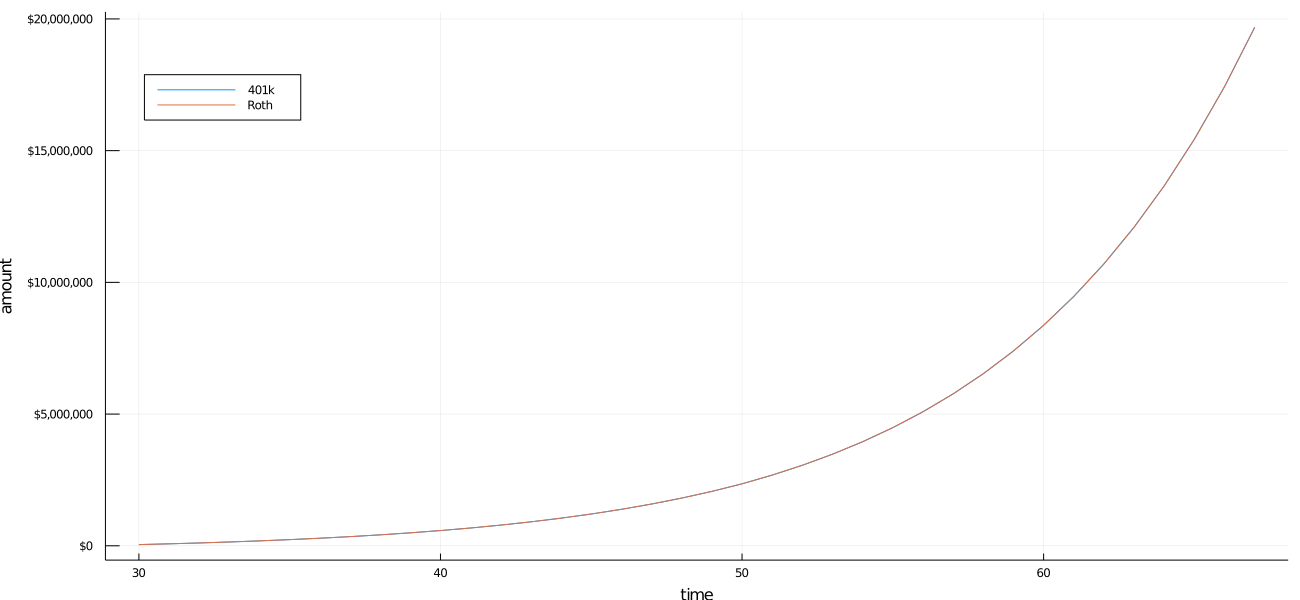

In [136]:
using Formatting
using Plots
gr()
plot(df[:,1], 
    [df[:,2]  df[:,3] ], 
    label    = ["401k" "Roth"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "amount",
    size     = (1300, 600), # width, height
    #yformatter = :plain, # or scientific
    yformatter = yi -> string("\$", format( yi, commas=true )), # e.g. $2,000,000
    layout = (1, 1)
    )

In [111]:
savefig("401k.png") 